# Lektion 17 - Statistics and Hypothesis Testing

## Syfte och mål
This lesson moves beyond descriptive statistics to inferential statistics, teaching you how to use samples to draw conclusions about a larger population. You will learn how to formulate testable questions (hypotheses) and use Python libraries like SciPy to conduct basic statistical tests, a core skill for rigorous data analysis.

## Learning Objectives
- Distinguish between descriptive and inferential statistics
- Understand the concepts of Null Hypothesis (H₀) and Alternative Hypothesis (Hₐ)
- Learn how to interpret p-values and make statistical decisions
- Conduct t-tests to compare two groups
- Perform correlation tests to assess relationships between variables
- Use visualization to support statistical findings


## Pre-class Reading

### Korta läshänvisningar:
- **Descriptive vs. Inferential**: [Difference between Descriptive and Inferential Statistics](https://www.geeksforgeeks.org/engineering-mathematics/difference-between-descriptive-and-inferential-statistics/)
- **Hypothesis Testing Basics**: [Understanding Hypothesis Testing](https://www.geeksforgeeks.org/software-testing/understanding-hypothesis-testing/)
- **Why Statistics in ML**: [Statistics for Machine Learning](https://www.geeksforgeeks.org/machine-learning/statistics-for-machine-learning/)

### Fördjupning / Längre läshänvisningar:
- **Central Limit Theorem (CLT)**: [Central Limit Theorem in Data Science](https://www.geeksforgeeks.org/machine-learning/central-limit-theorem-in-data-science-and-data-analytics/)
- **Student's t-test**: [T-test in Data Science](https://www.geeksforgeeks.org/data-science/t-test/)

### Videos:
- P-Value Explained: Visual breakdown of the p-value concept and its role in decision-making
- Statistical Tests in Python: Tutorial on using scipy.stats library for basic tests


## Classroom Activities (Hands-on Lab)

### Aktivitet 1: Discussion on Inference (15 min)
We'll start with a discussion to ensure students understand the meaning of H₀ and how a p-value is used to reject it.

**Questions:**
- "If our p-value is 0.01, what conclusion can we draw about the Null Hypothesis (H₀), assuming α=0.05?"
- "Why can't we just look at the means to decide if two groups are different? Why do we need a statistical test?"

### Aktivitet 2: Lab - T-tests and Correlation (60 min)
We'll use a dataset (e.g., comparing test scores between two different teaching methods) to conduct a t-test and interpret the results.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [6]:
# 1. Create Sample Data (Example: Scores from Group A and Group B)
data = {'Group': ['A'] * 15 + ['B'] * 15, 
        'Score': [78, 85, 92, 77, 88, 95, 81, 75, 90, 83, 86, 79, 87, 91, 84,
                  70, 75, 80, 72, 78, 82, 76, 81, 74, 77, 85, 80, 79, 73, 75]}
df_scores = pd.DataFrame(data)

print("Sample Data:")
print(df_scores.head(10))
print(f"\nDataset shape: {df_scores.shape}")
print(f"\nGroup distribution:")
print(df_scores['Group'].value_counts())


Sample Data:
  Group  Score
0     A     78
1     A     85
2     A     92
3     A     77
4     A     88
5     A     95
6     A     81
7     A     75
8     A     90
9     A     83

Dataset shape: (30, 2)

Group distribution:
Group
A    15
B    15
Name: count, dtype: int64


### Step 1: Descriptive Statistics


Descriptive Statistics:
Group A - Mean: 84.73, Std: 5.93, Count: 15
Group B - Mean: 77.13, Std: 4.10, Count: 15
Difference in means: 7.60


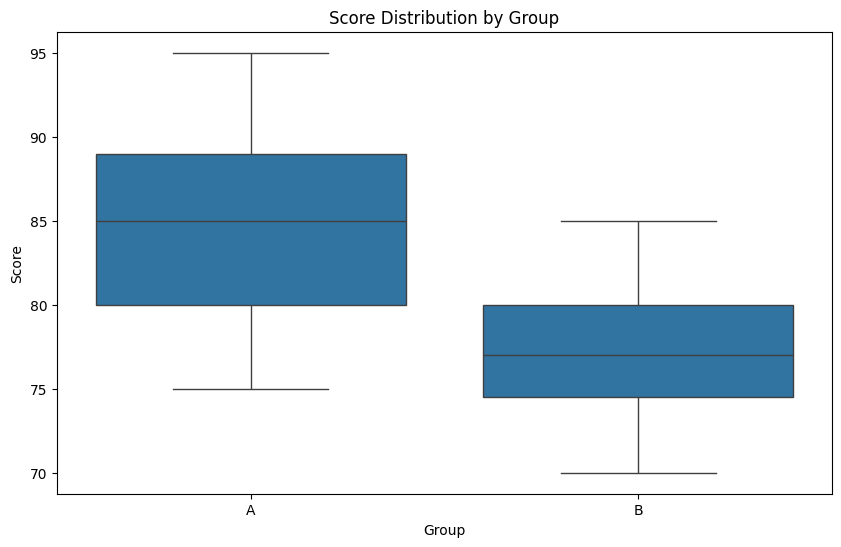

In [7]:
# Separate the groups
group_a = df_scores[df_scores['Group'] == 'A']['Score']
group_b = df_scores[df_scores['Group'] == 'B']['Score']

# Calculate descriptive statistics
print("Descriptive Statistics:")
print(f"Group A - Mean: {group_a.mean():.2f}, Std: {group_a.std():.2f}, Count: {len(group_a)}")
print(f"Group B - Mean: {group_b.mean():.2f}, Std: {group_b.std():.2f}, Count: {len(group_b)}")
print(f"Difference in means: {group_a.mean() - group_b.mean():.2f}")

# Visualize the distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scores, x='Group', y='Score')
plt.title('Score Distribution by Group')
plt.ylabel('Score')
plt.show()


### Step 2: Hypothesis Testing - T-test


In [8]:
# 2. Conduct Independent T-test
# H0: The mean scores of Group A and Group B are equal.
# Ha: The mean scores are different.

t_stat, p_value = stats.ttest_ind(group_a, group_b)

print("T-test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Mean Group A: {group_a.mean():.2f}")
print(f"Mean Group B: {group_b.mean():.2f}")

# Interpret the results
alpha = 0.05
print(f"\nSignificance level (α): {alpha}")
if p_value < alpha:
    print("✅ Conclusion: Reject H₀. The difference in means is statistically significant.")
    print(f"   We have evidence that Group A and Group B have different mean scores.")
else:
    print("❌ Conclusion: Fail to Reject H₀. The difference is not statistically significant.")
    print(f"   We do not have sufficient evidence to conclude the groups are different.")


T-test Results:
T-Statistic: 4.0800
P-Value: 0.0003
Mean Group A: 84.73
Mean Group B: 77.13

Significance level (α): 0.05
✅ Conclusion: Reject H₀. The difference in means is statistically significant.
   We have evidence that Group A and Group B have different mean scores.


### Step 3: Correlation Analysis


In [9]:
# 3. Create additional variables for correlation analysis
# Let's add some additional variables to demonstrate correlation testing
np.random.seed(42)
df_scores['Study_Hours'] = np.random.normal(5, 2, len(df_scores))
df_scores['Study_Hours'] = np.clip(df_scores['Study_Hours'], 0, 10)  # Clip to realistic range
df_scores['Study_Hours'] = df_scores['Study_Hours'].round(1)

# Add some correlation between study hours and scores
df_scores['Score'] = df_scores['Score'] + (df_scores['Study_Hours'] * 2) + np.random.normal(0, 5, len(df_scores))
df_scores['Score'] = np.clip(df_scores['Score'], 0, 100).round(1)

print("Extended Dataset with Study Hours:")
print(df_scores.head())
print(f"\nCorrelation matrix:")
print(df_scores[['Score', 'Study_Hours']].corr())


Extended Dataset with Study Hours:
  Group  Score  Study_Hours
0     A   87.0          6.0
1     A  100.0          4.7
2     A  100.0          6.3
3     A   87.7          8.0
4     A  100.0          4.5

Correlation matrix:
                Score  Study_Hours
Score        1.000000     0.494097
Study_Hours  0.494097     1.000000


In [10]:
# Conduct correlation test using scipy.stats.pearsonr
correlation_coef, p_value_corr = stats.pearsonr(df_scores['Score'], df_scores['Study_Hours'])

print("Correlation Test Results:")
print(f"Pearson correlation coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value_corr:.4f}")

# Interpret correlation results
if p_value_corr < 0.05:
    if abs(correlation_coef) > 0.7:
        strength = "strong"
    elif abs(correlation_coef) > 0.3:
        strength = "moderate"
    else:
        strength = "weak"
    
    direction = "positive" if correlation_coef > 0 else "negative"
    print(f"✅ Statistically significant {strength} {direction} correlation")
    print(f"   between Study Hours and Score (r = {correlation_coef:.3f})")
else:
    print("❌ No statistically significant correlation found")
    print(f"   between Study Hours and Score (r = {correlation_coef:.3f})")


Correlation Test Results:
Pearson correlation coefficient: 0.4941
P-value: 0.0055
✅ Statistically significant moderate positive correlation
   between Study Hours and Score (r = 0.494)


### Step 4: Visualization of Statistical Results


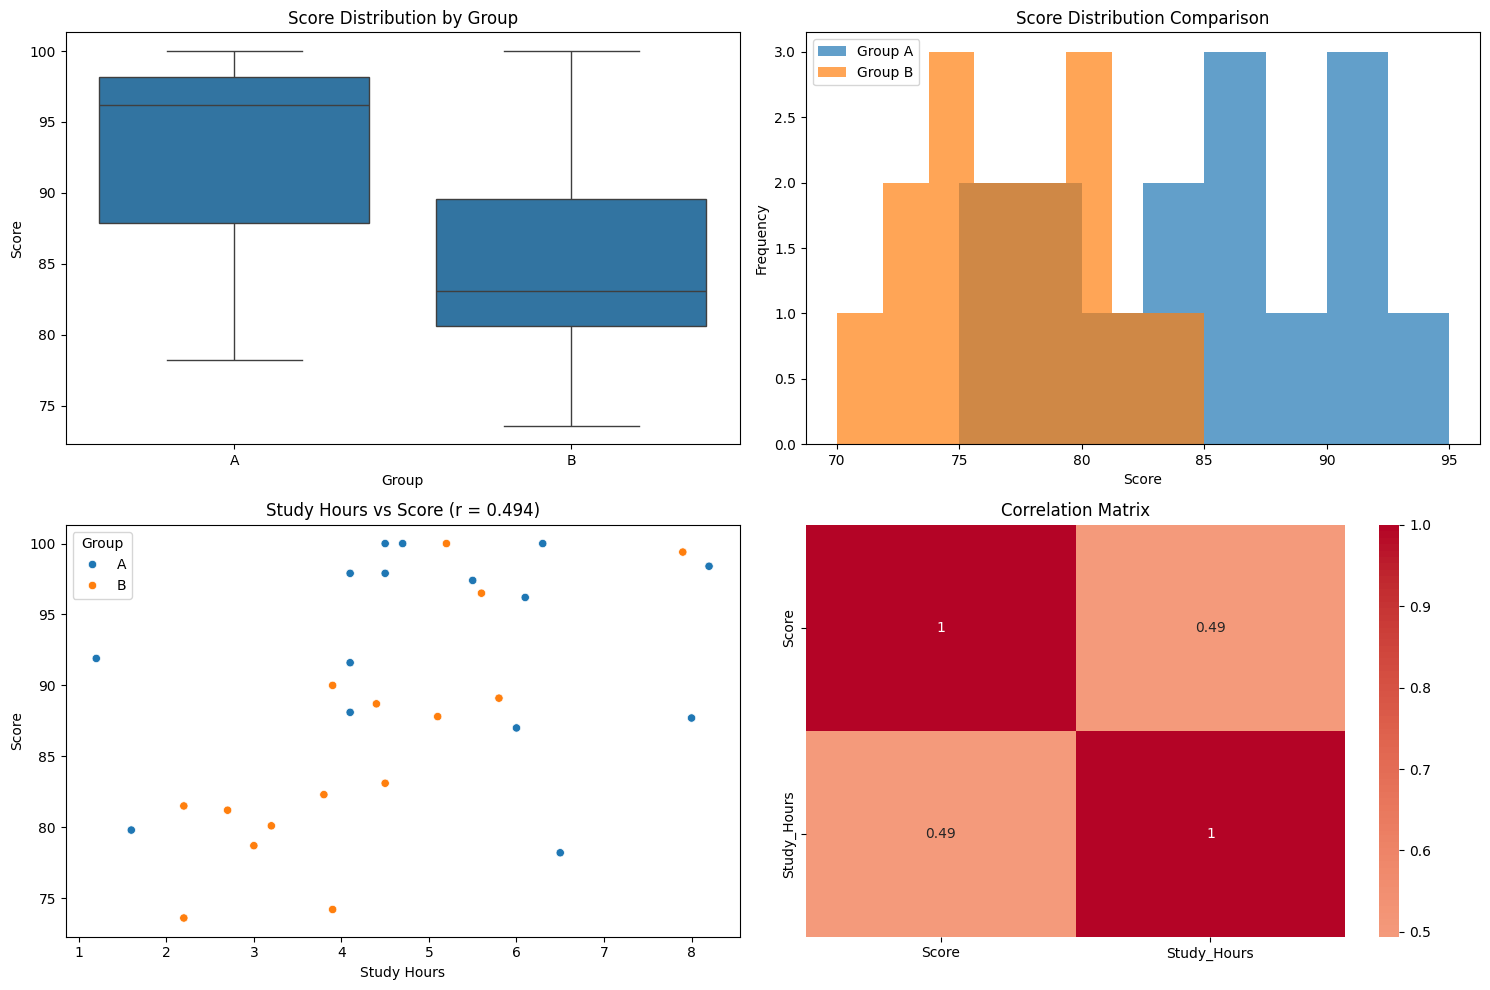

In [11]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Box plot for group comparison
sns.boxplot(data=df_scores, x='Group', y='Score', ax=axes[0, 0])
axes[0, 0].set_title('Score Distribution by Group')
axes[0, 0].set_ylabel('Score')

# 2. Histogram comparison
axes[0, 1].hist(group_a, alpha=0.7, label='Group A', bins=8)
axes[0, 1].hist(group_b, alpha=0.7, label='Group B', bins=8)
axes[0, 1].set_title('Score Distribution Comparison')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# 3. Scatter plot for correlation
sns.scatterplot(data=df_scores, x='Study_Hours', y='Score', hue='Group', ax=axes[1, 0])
axes[1, 0].set_title(f'Study Hours vs Score (r = {correlation_coef:.3f})')
axes[1, 0].set_xlabel('Study Hours')
axes[1, 0].set_ylabel('Score')

# 4. Correlation heatmap
corr_matrix = df_scores[['Score', 'Study_Hours']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


### Aktivitet 3: Hands-on - Visualization of Statistical Results (30 min)
Students will use visualization skills (from L13/L14) to visually support the findings of the statistical tests (e.g., using a boxplot to show the score distributions of the two groups).

**Exercise:**
1. Choose two variables from your dataset
2. Conduct appropriate statistical tests (t-test, correlation, etc.)
3. Create visualizations that support your statistical findings
4. Interpret both the statistical results and visualizations
5. Document your conclusions


## Key Statistical Concepts

### Hypothesis Testing Framework
1. **Null Hypothesis (H₀)**: The default assumption (e.g., no difference between groups)
2. **Alternative Hypothesis (Hₐ)**: What we want to prove (e.g., groups are different)
3. **P-value**: Probability of observing the data if H₀ is true
4. **Significance Level (α)**: Threshold for rejecting H₀ (commonly 0.05)
5. **Decision Rule**: If p-value < α, reject H₀; otherwise, fail to reject H₀

### Common Statistical Tests
- **T-test**: Compare means between two groups
- **Correlation Test**: Assess linear relationship between two variables
- **Chi-square Test**: Test independence between categorical variables
- **ANOVA**: Compare means across multiple groups

### Interpreting Results
- **P-value < 0.05**: Statistically significant (reject H₀)
- **P-value ≥ 0.05**: Not statistically significant (fail to reject H₀)
- **Effect Size**: Practical significance (how large is the difference?)
- **Confidence Intervals**: Range of plausible values for the parameter


## Key Takeaways

1. **Statistics vs. Intuition**: Statistical tests provide objective evidence beyond visual inspection
2. **Hypothesis Testing**: Systematic approach to testing claims about data
3. **P-value Interpretation**: Low p-value = strong evidence against null hypothesis
4. **Statistical vs. Practical Significance**: A result can be statistically significant but not practically meaningful
5. **Visualization + Statistics**: Combine statistical tests with visualizations for comprehensive analysis
6. **Assumptions Matter**: Ensure your data meets the assumptions of the statistical test

## Best Practices

- **State Hypotheses Clearly**: Always define H₀ and Hₐ before testing
- **Choose Appropriate Tests**: Match the test to your data type and research question
- **Report Effect Sizes**: Don't just report p-values; include effect sizes
- **Check Assumptions**: Verify that your data meets test assumptions
- **Use Visualizations**: Always visualize your data alongside statistical tests
- **Document Everything**: Keep track of all tests performed and their results

## Common Pitfalls

- **P-hacking**: Don't test multiple hypotheses without adjusting significance levels
- **Misinterpreting P-values**: P-value ≠ probability that H₀ is true
- **Ignoring Effect Size**: Statistical significance ≠ practical importance
- **Multiple Comparisons**: Be careful when testing many hypotheses simultaneously
- **Assumption Violations**: Using tests when assumptions are violated

## Next Steps
- Practice with your own datasets
- Learn about additional statistical tests (ANOVA, Chi-square)
- Explore advanced statistical concepts (confidence intervals, effect sizes)
- Apply statistical thinking to your data science projects
